# Gini Index and Entropy

## Dependency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math
from typing import List, Union

## Function

In [2]:
def binary_gini(p: float) -> float:
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def multi_class_gini(data: List[int]) -> float:
    counter = Counter(data)
    proportions = [c / len(data) for c in counter.values()]
    gini = 0
    for proportion in proportions:
        gini += proportion * (1 - proportion)
    return gini


def binary_entropy(p: float) -> float:
    return -1 * (p * math.log(p) + (1 - p) * math.log(1 - p))


def multi_class_entropy(data: List[int]) -> float:
    counter = Counter(data)
    proportions = [c / len(data) for c in counter.values()]
    entropy = 0
    for proportion in proportions:
        entropy += proportion * math.log(proportion)
    entropy *= -1
    return entropy

## Classification error rate

In [3]:
classes = ['a', 'a', 'b', 'b', 'c', 'c', 'c', 'c', 'c']
count = Counter(classes)

In [4]:
p = {}
for k, v in count.items():
    p[k] = v / len(classes)

In [5]:
p

{'a': 0.2222222222222222, 'b': 0.2222222222222222, 'c': 0.5555555555555556}

In [6]:
max_p = float('-inf')
for k, v in p.items():
    if v > max_p:
        max_p = v
        max_class = k

In [7]:
error_rate = 1 - max_p
print(f'Error rate: {error_rate}')

Error rate: 0.4444444444444444


- Error rate: $E = 1 - max_k(\hat p_{mk})$
  - $\hat p_{mk}$ represets the proportion of training observations in the $m$th region that are from the $k$th class.
  - The most common class is the prediction, so the rest of the classes are misclassified, so error rate is 1 minus max proportion.

## Gini index

### Binary classification

In [8]:
data = [1, 1, 1, 0, 0]
count = Counter(data)
p = {}
for k, v in count.items():
    p[k] = v / len(data)
    
print(f'Count: {count}')
print(f'Proportion: {p}')

gini_index = 0
for k, v in p.items():
    gini_index += p[k] * (1 - p[k])

print(f'Gini index: {gini_index}')

Count: Counter({1: 3, 0: 2})
Proportion: {1: 0.6, 0: 0.4}
Gini index: 0.48


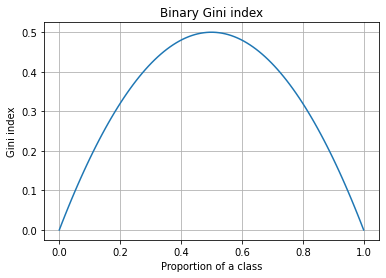

In [9]:
xs = np.linspace(0, 1, 100)
gini_indices = [binary_gini(x) for x in xs]

plt.plot(
    xs,
    gini_indices
)
plt.title('Binary Gini index')
plt.xlabel('Proportion of a class')
plt.ylabel('Gini index')
plt.grid()
plt.show()

### Multi-class classification

In [15]:
data = [0, 1, 2, 3, 4]
print(f'Gini: {multi_class_gini(data):.3f} from data: {data}')

data = [0, 0, 0, 0, 0, 1, 2, 3, 4]
print(f'Gini: {multi_class_gini(data):.3f} from data: {data}')

data = [0, 0, 0, 0, 0, 0, 0, 0, 1]
print(f'Gini: {multi_class_gini(data):.3f} from data: {data}')

Gini: 0.800 from data: [0, 1, 2, 3, 4]
Gini: 0.642 from data: [0, 0, 0, 0, 0, 1, 2, 3, 4]
Gini: 0.198 from data: [0, 0, 0, 0, 0, 0, 0, 0, 1]


## Entropy

### Binary classification

C:\Users\YKITAY~1\AppData\Local\Temp/ipykernel_23248/671751185.py:21: RuntimeWarning: divide by zero encountered in log
  return -1 * (p * np.log(p) + (1 - p) * np.log(1 - p))
C:\Users\YKITAY~1\AppData\Local\Temp/ipykernel_23248/671751185.py:21: RuntimeWarning: invalid value encountered in double_scalars
  return -1 * (p * np.log(p) + (1 - p) * np.log(1 - p))


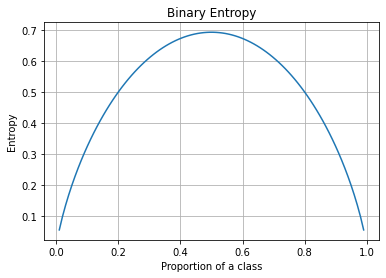

In [57]:
xs = np.linspace(0, 1, 100)
entropys = [binary_entropy(x) for x in xs]

plt.plot(
    xs,
    entropys
)
plt.title('Binary Entropy')
plt.xlabel('Proportion of a class')
plt.ylabel('Entropy')
plt.grid()
plt.show()

### Multi-class classification

In [16]:
data = [0, 1, 2, 3, 4]
print(f'Entropy: {multi_class_entropy(data):.3f} from data: {data}')

data = [0, 0, 0, 0, 0, 1, 2, 3, 4]
print(f'Entropy: {multi_class_entropy(data):.3f} from data: {data}')

data = [0, 0, 0, 0, 0, 0, 0, 0, 1]
print(f'Entropy: {multi_class_entropy(data):.3f} from data: {data}')

Entropy: 1.609 from data: [0, 1, 2, 3, 4]
Entropy: 1.303 from data: [0, 0, 0, 0, 0, 1, 2, 3, 4]
Entropy: 0.349 from data: [0, 0, 0, 0, 0, 0, 0, 0, 1]


## Reference

- [SCIKIT-LEARN : DECISION TREE LEARNING I - ENTROPY, GINI, AND INFORMATION GAIN](https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php)